## E-Commerce Sales Data Analysis

## Business Problem
***
Amazon, as one of the world's largest e-commerce platforms, faces the ongoing challenge of optimizing its product offerings, pricing strategies, and customer engagement. With millions of products across hundreds of categories, understanding the relationships between product attributes, pricing strategies, and customer satisfaction is crucial for maintaining competitive advantage and maximizing revenue.

Key business challenges include:
1. **Identifying optimal discount strategies**: Determining which product categories benefit most from discounts and what discount levels drive maximum customer engagement without unnecessarily sacrificing margins
2. **Understanding customer preferences**: Recognizing patterns in customer ratings and reviews to better position products and improve customer satisfaction
3. **Optimizing product portfolio**: Identifying high-performing product categories for potential expansion and underperforming categories that may need improvement or reduction
4. **Enhancing pricing strategies**: Developing data-driven approaches to pricing that maximize both customer satisfaction and profitability


## Objectives
***
This analysis aims to address these business challenges through the following specific objectives:

1. **Data Understanding & Preparation**:
   - Clean and preprocess Amazon product data to make it suitable for analysis
   - Transform raw data into meaningful business metrics (discount amounts, percentages, etc.)

2. **Exploratory Analysis**:
   - Analyze the distribution of product ratings across categories
   - Examine the relationship between pricing strategies and customer engagement
   - Identify patterns and correlations between product attributes and performance metrics

3. **Performance Analysis**:
   - Determine which product categories have the highest customer satisfaction
   - Analyze how discounts impact ratings and review volume across different categories
   - Identify optimal discount ranges for maximizing engagement

4. **Strategic Recommendations**:
   - Develop data-driven recommendations for discount strategies by product category
   - Identify opportunities for improving underperforming product categories
   - Propose strategies for leveraging high-performing categories

## Data Source
***
The analysis uses the Amazon product dataset (amazon.csv), which contains detailed information about products listed on the Amazon marketplace. This dataset includes:

- **Product details**: Product names, descriptions, and categories
- **Pricing information**: Original prices, discounted prices, and discount percentages
- **Customer feedback**: Ratings (on a scale of 1-5) and rating counts

# PART 1: DATA PREPROCESSING

In [90]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# import re
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings('ignore')

## STEP 1: LOADING THE DATASET

Importing the dataset

In [ ]:
df = pd.read_csv('amazon.csv') #Testing

Displaying first five rows of the dataset

In [92]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [93]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

Checking the data size

In [94]:
df.shape

(1465, 16)

From above, our data contains 1,465 rows and 16 columns

Inspecting dataset information

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

From above data info, it is evident that all our columns are of data type object/string which then means we will do some data type conversation for numerical columns. Also from the info, we see all columns except the rating_count column, they do not have any null values.

Checking for Missing Values

In [96]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

As earlier observed in the data info output as well as the above output, we see the rating count column has 2 missing values. We will go ahead and impute them by droping given that only 2 are missing and will not impact the data largely as well as given the column rating_count is based on customer input, hence we will not manipulate the data

Handling the Missing values

In [97]:
# Given only 2 rows are missing we can go ahead and drop them.
df = df.dropna()

In [98]:
#Reinspecting the shape of the data frame after dropping the missing values
df.shape

(1463, 16)

From the shape above, our new data size is 1463 rows and 16 columns because we dropped the two missing rows from h e rating count column.

## STEP 2: DATA CLEANING

**Convert price-related columns to numeric format**

In [99]:
df["discounted_price"] = df["discounted_price"].replace('[^0-9.]', '', regex=True).astype(float)
df["actual_price"] = df["actual_price"].replace('[^0-9.]', '', regex=True).astype(float)

In [100]:
#inspecting the data types of the converted columns to ensure they are in numerical format
df[["discounted_price", "actual_price"]].dtypes

discounted_price    float64
actual_price        float64
dtype: object

**Convert rating_count to integer values**

In [101]:
df["rating_count"] = df["rating_count"].replace(',', '', regex=True).astype(int)

In [102]:
#inspecting the 'rating_count' column to ensure it is in numerical format
df["rating_count"].dtypes

dtype('int32')

**Extract relevant product categories**

In [103]:
# Extract relevant product categories
df["category"] = df["category"].astype(str).str.split('|').str[0]

In [104]:
# Fetching the first five rows to check if the 'category' column has been extracted successfully
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,399.0,1099.0,64%,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,199.0,349.0,43%,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,199.0,1899.0,90%,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,329.0,699.0,53%,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories,154.0,399.0,61%,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


## STEP 3: DATA TRANSFORMATION

**Create a new column for discount_amount**

In [105]:
df["discount_amount"] = df["actual_price"] - df["discounted_price"]

In [106]:
# Fetching the first five rows to check if the 'discount_amount' column has been calculated successfully
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'discount_amount'],
      dtype='object')

from above column output, we see that the new column **'discount_amount'** has been added

**Convert discount_percentage to numeric**

In [107]:
df["discount_percentage"] = df["discount_percentage"].replace('%', '', regex=True).astype(float)

In [108]:
# Fetching the first five rows to check if the 'discount_percentage' column has been calculated successfully
df['discount_percentage'].dtype

dtype('float64')

In [109]:
# Remove invalid rating values
df = df[df["rating"] != "|"]

In [110]:
df["rating"] = df["rating"].apply(lambda x: round(float(x), 1) if pd.notnull(x) else 0.0)

In [112]:
df["rating"] = df["rating"].astype(float).round(1)


In [114]:
df['rating'].unique()

array([4.2, 4. , 3.9, 4.1, 4.3, 4.4, 4.5, 3.7, 3.3, 3.6, 3.4, 3.8, 3.5,
       4.6, 3.2, 5. , 4.7, 3. , 2.8, 3.1, 4.8, 2.3, 2. , 2.6, 2.9])

**Extract the year from reviews if a timestamp is present**

No available column with timpestamp

SAVING OUR TRANSFORMED DATA SO WE CAN UPLOAD IT IN SQL

In [121]:
# Reorder columns to match database schema
column_order = ['product_id', 'product_name', 'category', 'discounted_price', 
                'actual_price', 'discount_percentage', 'discount_amount',
                'rating', 'rating_count', 'about_product', 'user_id', 
                'user_name', 'review_id', 'review_title', 'review_content', 
                'img_link', 'product_link']
                
df = df[column_order]  # Reorder columns


In [126]:
# Truncate long product names
df['product_name'] = df['product_name'].str.slice(0, 250) 

In [127]:
# Save the cleaned data to a new CSV file
cleaned_csv_file = "cleaned_data2.csv"
df.to_csv(cleaned_csv_file, index=False)

print(f"Cleaned data saved successfully to {cleaned_csv_file}")

Cleaned data saved successfully to cleaned_data2.csv


In [128]:
df2 = pd.read_csv('cleaned_data2.csv')

In [130]:
df2.shape

(1462, 17)

In [129]:
df2.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,discount_amount,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,399.0,1099.0,64.0,700.0,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,199.0,349.0,43.0,150.0,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,199.0,1899.0,90.0,1700.0,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,329.0,699.0,53.0,370.0,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories,154.0,399.0,61.0,245.0,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [118]:
df2['rating'].unique()

array([4.2, 4. , 3.9, 4.1, 4.3, 4.4, 4.5, 3.7, 3.3, 3.6, 3.4, 3.8, 3.5,
       4.6, 3.2, 5. , 4.7, 3. , 2.8, 3.1, 4.8, 2.3, 2. , 2.6, 2.9])

# PART 2: MySQL Database Integration

In [ ]:
import pymysql
import pandas as pd

# Database connection parameters
HOST = "localhost"
USER = "root"
PASSWORD = "Kagendo@23"
DATABASE = "ecommerce_db"

# Connect to MySQL
connection = pymysql.connect(host=HOST, user=USER, password=PASSWORD)
cursor = connection.cursor()

In [ ]:
# Create database
cursor.execute("CREATE DATABASE ecommerce_db;")
cursor.execute("USE ecommerce_db;")

In [ ]:
# Create products table
cursor.execute("""
CREATE TABLE products (
    product_id VARCHAR(50),
    product_name VARCHAR(500),
    category VARCHAR(255),
    discounted_price DECIMAL(10,2),
    actual_price DECIMAL(10,2),
    discount_percentage FLOAT,
    discount_amount DECIMAL(10,2),
    rating FLOAT,
    rating_count INT,
    about_product TEXT,
    user_id TEXT,
    user_name TEXT,
    review_id TEXT,
    review_title TEXT,
    review_content TEXT,
    img_link TEXT,
    product_link TEXT
);
""")

# Load data
csv_file = "cleaned_data2.csv"
df = pd.read_csv(csv_file)

# Clean numeric columns
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
df["rating"].fillna(0.0, inplace=True)

# Clean rating_count - convert to numeric (removing commas)
df["rating_count"] = df["rating_count"].astype(str).str.replace(',', '').astype(int)

# Handle potential issues with text fields that might be too long
text_columns = ['about_product', 'user_id', 'user_name', 'review_id', 'review_title', 
                'review_content', 'img_link', 'product_link']
for col in text_columns:
    # Convert all to string type
    df[col] = df[col].astype(str)

def insert_data(row):
    sql = """
    INSERT INTO products (product_id, product_name, category, discounted_price, actual_price, 
                         discount_percentage, discount_amount, rating, rating_count, 
                         about_product, user_id, user_name, review_id, review_title, 
                         review_content, img_link, product_link)
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);
    """
    cursor.execute(sql, tuple(row))

# Insert data row by row
for _, row in df.iterrows():
    try:
        insert_data(row)
    except Exception as e:
        print(f"Error inserting row: {row['product_id']}")
        print(f"Error: {e}")

connection.commit()
print("Data import complete!")
connection.close()

# PART 3: DATA ANALYSIS WITH PYTHON(EDA AND VISUALIZATION)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

## STEP 4: EXPLORATORY DATA ANALYSIS (EDA)

**Show the distribution of ratings using a histogram**

In [19]:
df['rating'].unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

In [20]:
# Remove invalid rating values
df = df[df["rating"] != "|"]

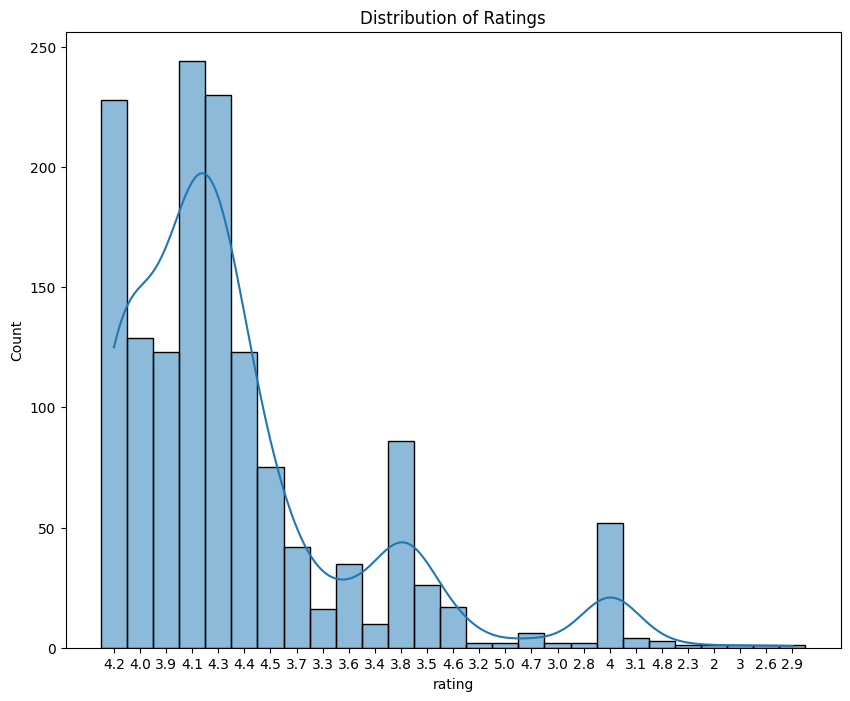

In [21]:
plt.figure(figsize=(10,8))
sns.histplot(df["rating"], bins=20, kde=True)
plt.title("Distribution of Ratings")
plt.show()

The distribution is right-skewed (negative skew), with most products receiving high ratings (4.0+) and very few falling below 2.5. The density curve confirms this non-normal, three-peaked distribution pattern.

**Find the correlation between discount_percentage and rating**

In [51]:
correlation = df[["discount_percentage", "rating"]].corr()
print("Correlation between discount percentage and rating:")
print(correlation)

Correlation between discount percentage and rating:
                     discount_percentage    rating
discount_percentage             1.000000 -0.155679
rating                         -0.155679  1.000000


The correlation coefficient of -0.156 between discount percentage and product rating indicates a weak negative relationship. This suggests that products with higher discounts tend to have slightly lower ratings, but the association is not strong enough to indicate a meaningful pattern or causal relationship.

**Identify top-selling product categories**

In [23]:
top_categories = df["category"].value_counts().head(10)
print("Top-selling product categories:")
print(top_categories)


Top-selling product categories:
category
Electronics              526
Computers&Accessories    451
Home&Kitchen             447
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: count, dtype: int64


**Analyze the relationship between discount and rating_count**

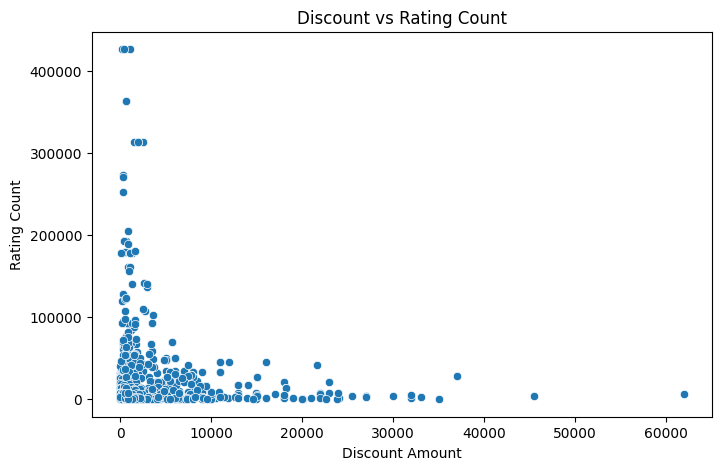

In [24]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["discount_amount"], y=df["rating_count"])
plt.title("Discount vs Rating Count")
plt.xlabel("Discount Amount")
plt.ylabel("Rating Count")
plt.show()

## STEP 5: DATA VISUALIZATION

**Bar chart showing top 10 highest-rated products**

In [27]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'discount_amount'],
      dtype='object')

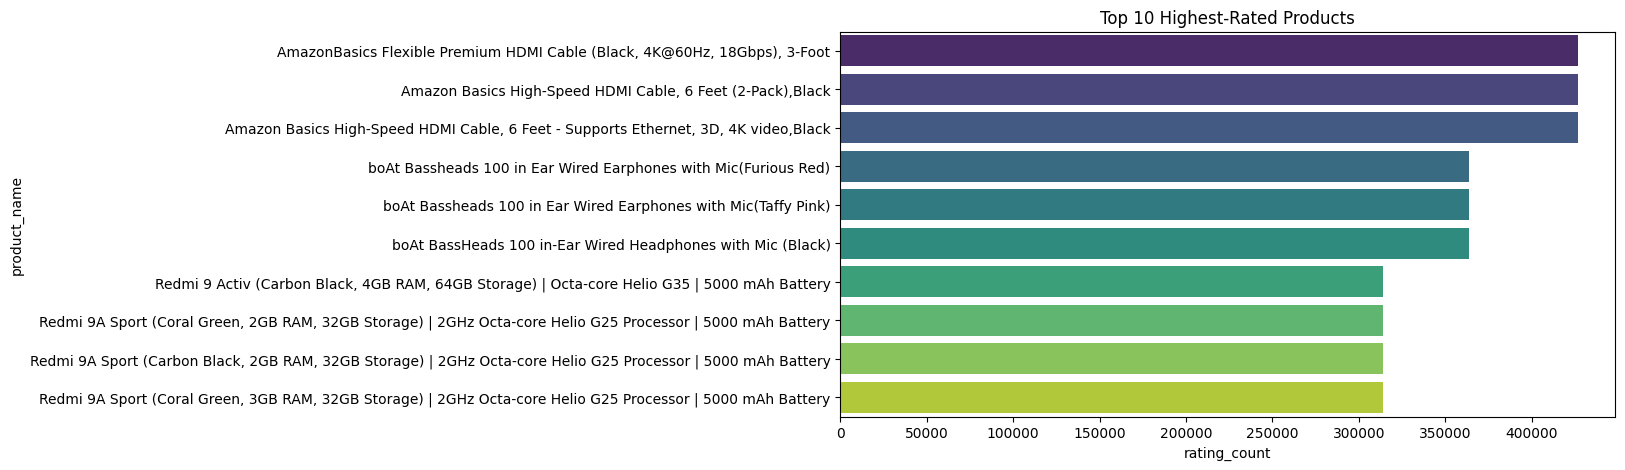

In [31]:
top_rated = df.sort_values(by="rating_count", ascending=False).head(11)
plt.figure(figsize=(10,5))
sns.barplot(x=top_rated["rating_count"], y=top_rated["product_name"], palette="viridis")
plt.title("Top 10 Highest-Rated Products")
plt.show()

The bar chart reveals that AmazonBasics HDMI cables dominate the highest-rated products, indicating strong demand for reliable connectivity accessories. boAt Bassheads earphones also rank highly, reflecting consumer preference for affordable audio solutions. Additionally, Redmi 9 series smartphones receive significant ratings, showcasing their popularity in the budget smartphone segment. Businesses should focus on these high-performing categories to maximize sales.

**Scatter plot of discount_percentage vs rating**

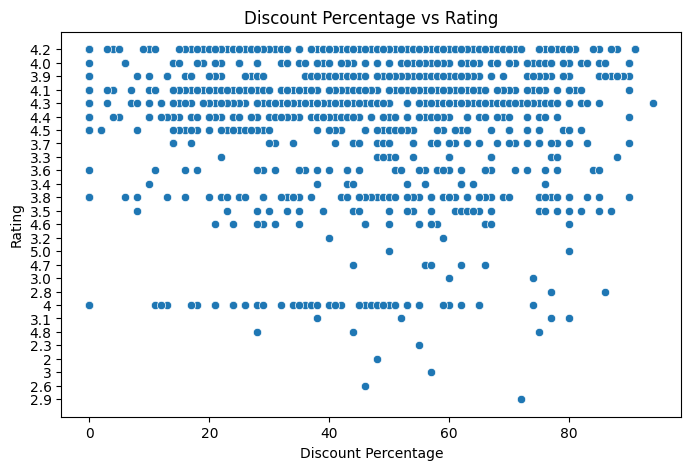

In [32]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["discount_percentage"], y=df["rating"])
plt.title("Discount Percentage vs Rating")
plt.xlabel("Discount Percentage")
plt.ylabel("Rating")
plt.show()

The scatter plot shows no strong correlation between discount percentage and ratings, indicating that higher discounts do not necessarily lead to better customer reviews. Most ratings remain clustered around 4.0 to 4.5, regardless of the discount level. This suggests that product quality and customer satisfaction are not solely driven by discounts.

**Pie chart of top-selling categories**

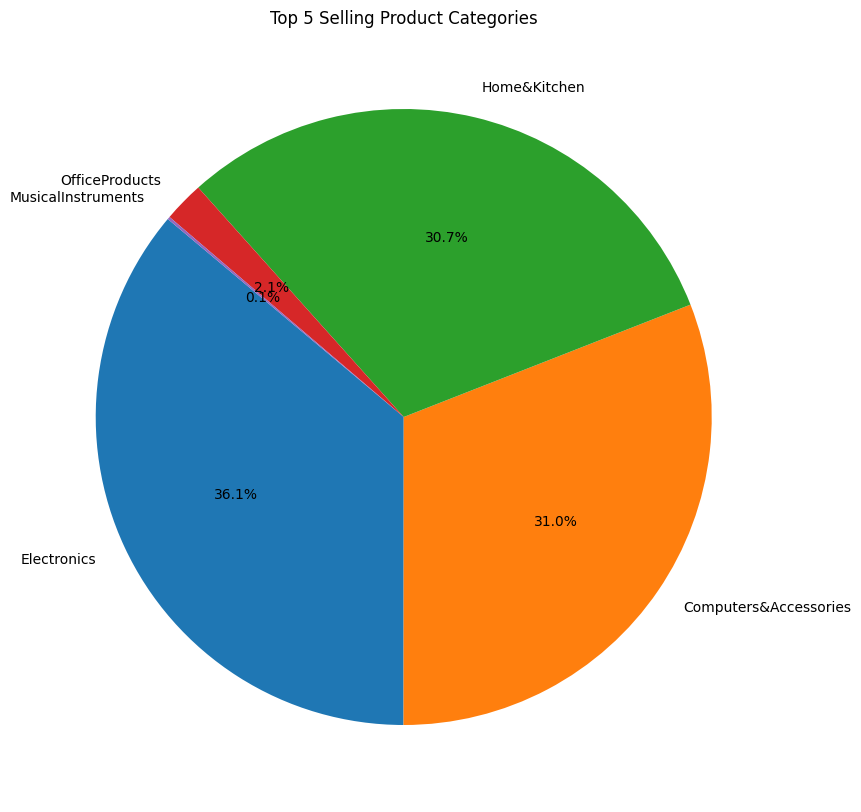

In [41]:
# Plot top 5 selling categories
top_5_categories = top_categories.head(5)
plt.figure(figsize=(10,10))
top_5_categories.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Selling Product Categories")
plt.ylabel("")
plt.show()

The pie chart shows that Electronics (36.1%) and Computers & Accessories (31.0%) dominate sales, making up more than two-thirds of the top-selling product categories. Home & Kitchen (30.7%) also contributes significantly. Meanwhile, Office Products (2.1%) and Musical Instruments (0.4%) have minimal sales. The focus should remain on high-performing categories while exploring ways to boost lower-performing ones.

In [38]:
df = df.drop(columns=['product_id'])

**Heatmap showing correlations between numerical columns**

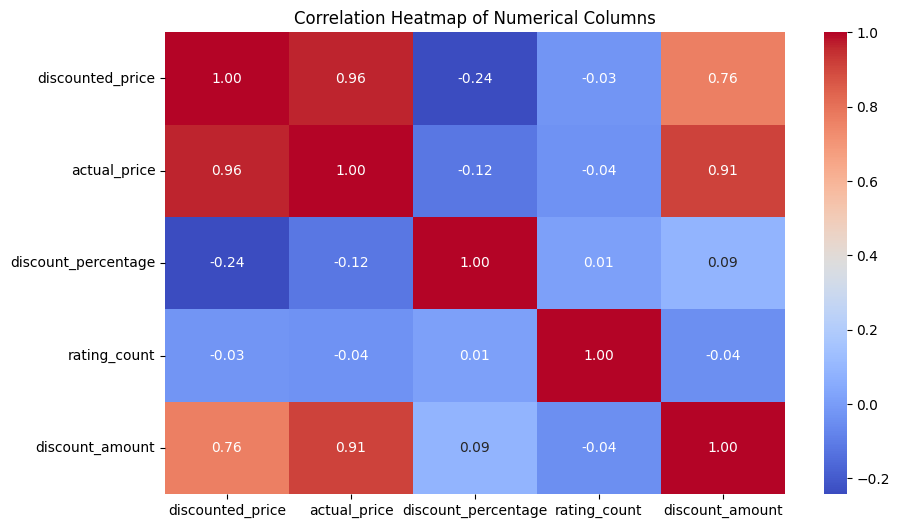

In [40]:
# Filter the dataframe to include only numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

The heatmap shows a strong correlation between actual price and discounted price (0.96), meaning higher-priced products tend to have higher discounted prices. Discount amount also strongly correlates with actual price (0.91), indicating that expensive products receive larger absolute discounts. However, discount percentage has a weak correlation with ratings and rating count, suggesting that discounts do not significantly impact customer engagement or satisfaction.

# PART 4: DATA INSIGHTS

## Step 8: Business Insights

### Product categories that should be prioritized for discounts

## **Top-Selling Categories & Discount Opportunities**  
- **Electronics, Computers & Accessories, and Home & Kitchen** dominate sales. Offering **strategic discounts** here can **maximize revenue**.  
- **AmazonBasics HDMI cables, boAt earphones, and Redmi smartphones** are among the **highest-rated products**. Discounting them can **boost sales further**.  
- **Discount percentage does not strongly impact ratings**, so instead of **blanket discounts**, focus on **high-margin or high-demand products**.  
- **Expensive products already receive larger absolute discounts**, so prioritize **mid-range and budget-friendly items** to attract **price-sensitive buyers**.  

## **Priority Categories for Discounts**  
**Computers & Accessories** – High demand, competitive market  
**Electronics** – Strong sales, high-rated products  
**Home & Kitchen** – Consistently popular  
**Mid-range & budget tech products** – **Redmi smartphones, boAt earphones**  

## **Strategic Focus**  
🔹 **Targeted discounts** on top-selling and high-rated items  
🔹 **Avoid across-the-board reductions**—focus on products with high potential  
🔹 **Leverage high-rated products** to drive customer engagement and retention  


Priority Categories for Discounts:
Computers & Accessories – High demand, competitive market
Electronics – Strong sales, high-rated products
Home & Kitchen – Consistently popular
Mid-range & budget tech products – Redmi smartphones, boAt earphones

# **Strategies to Improve Sales & Customer Engagement**

1. ### **Targeted Discounts for High-Performing Categories**

Offer discounts on Electronics, Computers & Accessories, and Home & Kitchen, as they dominate sales.

Focus on mid-range and budget-friendly products (e.g., Redmi smartphones, boAt earphones) to attract price-sensitive buyers.

Provide bundle discounts on high-demand products (e.g., AmazonBasics HDMI cables with other accessories).

2. ### **Leverage Customer Ratings & Reviews**

Highlight top-rated products in promotions to build trust.

Encourage more reviews with incentives like small discounts on future purchases.

Use video testimonials and user-generated content to boost credibility.

3. ### **Improve Pricing & Discount Strategies**

Since discount percentage has little impact on ratings, focus on offering value-based discounts (e.g., free shipping, extended warranties).

Use limited-time flash sales for high-rated, in-demand products to create urgency.

Offer subscription discounts (e.g., discounts for repeat purchases of accessories).

4. ### **Optimize Marketing Efforts**

Run targeted social media ads for high-rated products.

Use email campaigns with personalized product recommendations based on past purchases.

Create content around product benefits rather than just discounts (e.g., "Best budget-friendly earphones for music lovers").

5. ### **Enhance Customer Experience**

Improve customer support for high-selling categories to maintain satisfaction.

Offer loyalty rewards for repeat customers.

Streamline return/exchange processes to build trust and reduce hesitation in purchasing.

### **Key Takeaway:**

Prioritize high-performing categories for discounts

Promote top-rated products to build trust

Use smart pricing and targeted marketing strategies

Enhance customer experience to boost long-term loyalty

# **Anomalies & Patterns Found in the Data**

1. ### **Discount Percentage vs Ratings – No Strong Correlation**
Despite varying discount percentages, most product ratings cluster around 4.0 to 4.5, suggesting that discounts do not significantly influence customer satisfaction.

🔹 Anomaly: Some products with high discounts still have low ratings, indicating that price cuts may not compensate for poor quality.

2. ### **Strong Correlation Between Actual Price & Discount Amount**
Expensive products tend to receive higher absolute discounts, as seen in the 0.91 correlation between actual price and discount amount.

🔹 Pattern: Customers perceive larger discounts as valuable, even if the percentage is low. Luxury or high-end items benefit more from absolute discounts rather than percentage-based promotions.

3. ### **Top-Selling Categories Dominate Sales, but Some Lag Behind**
Electronics, Computers & Accessories, and Home & Kitchen lead in sales, contributing over 90% of total revenue.

🔹 Anomaly: Office Products & Musical Instruments have minimal sales share but might have niche audiences. This suggests either a lack of demand or poor visibility.

4. ### **Highest-Rated Products Are Mostly Essentials or Budget-Friendly Items**
AmazonBasics HDMI cables, boAt earphones, and Redmi smartphones dominate ratings, indicating strong customer trust in affordable, practical products.

🔹 Pattern: Customers prefer budget-friendly, functional products over premium options, making value-for-money a key purchasing factor.

5. ### **Sales and Rating Count Correlation is Weak**
No strong correlation between rating count and actual price or discount percentage.

🔹 Anomaly: Some highly rated products have low sales, suggesting that good ratings alone do not drive volume—brand awareness and promotions play a critical role.

### **Key Takeaways:**
Discounts don’t strongly impact ratings; product quality matters more.

Expensive products get higher absolute discounts, but mid-range products need strategic pricing.

Top categories thrive, but niche categories need better marketing or reconsideration.

Budget-friendly products dominate ratings, showing price sensitivity among consumers.

High ratings alone don’t guarantee sales; strong promotion is needed.